## Importing LIbraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')


## Data Collection And Pre-procissing
* Cheking The Integrty Of Data
1. Missing values
2. Duplicate Values 
3. Incomplete Data
4. Outlier

In [2]:
## loading the dataset into dataframe
train_data = pd.read_csv('Data_Train_new.csv')
pd.set_option('display.max_columns' , None)
train_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
## Numbers of rows and columns
train_data.shape

(10683, 11)

In [4]:
## Checking for missing values 
print(f"Missing values are :{[col for col in train_data.columns if train_data[col].isnull().sum()]}")
print('__________________________________________________')
print(f"Missing values are : \n{train_data.isnull().sum()}")


Missing values are :['Route', 'Total_Stops']
__________________________________________________
Missing values are : 
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [5]:
train_data[train_data.isnull().any(axis = 1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [6]:
## Handling Missing values 
train_data['Total_Stops'] = train_data['Total_Stops'].fillna(train_data['Total_Stops'].mode()[0])
print(f"Missing values are :{[col for col in train_data.columns if train_data[col].isnull().sum()]}")


Missing values are :['Route']


In [7]:
## we can drop Route becaous we have alternative features Total_Stops
del(train_data['Route'])

In [8]:
## checking for duplicate values
train_data.duplicated().sum()

220

In [9]:
train_data[train_data['Date_of_Journey']=='9/06/2019'].head(10)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
25,Jet Airways,9/06/2019,Delhi,Cochin,21:25,12:35 10 Jun,15h 10m,2 stops,No info,13292
80,Jet Airways,9/06/2019,Kolkata,Banglore,21:10,12:00 10 Jun,14h 50m,1 stop,In-flight meal not included,10844
101,Jet Airways,9/06/2019,Kolkata,Banglore,20:00,08:15 10 Jun,12h 15m,1 stop,No info,14939
143,IndiGo,9/06/2019,Delhi,Cochin,07:35,16:10,8h 35m,1 stop,No info,6442
149,Multiple carriers,9/06/2019,Delhi,Cochin,12:50,21:00,8h 10m,1 stop,No info,7005
162,Air India,9/06/2019,Kolkata,Banglore,12:00,13:15 10 Jun,25h 15m,1 stop,No info,7662
172,Jet Airways,9/06/2019,Kolkata,Banglore,09:35,21:05,11h 30m,1 stop,No info,14676
216,Vistara,9/06/2019,Kolkata,Banglore,07:10,18:50,11h 40m,1 stop,No info,9555
219,Multiple carriers,9/06/2019,Delhi,Cochin,09:00,19:00,10h,1 stop,No info,12192


There is no duplicates

## Features Engineering Step

In [10]:
## add 3 new columns for day and month and year from Date_of_Journey
train_data['Day_of_Journey'] = pd.to_datetime(train_data['Date_of_Journey']).dt.day
train_data['Month_of_Journey'] = pd.to_datetime(train_data['Date_of_Journey']).dt.month
train_data['Year_of_Journey'] = pd.to_datetime(train_data['Date_of_Journey']).dt.year

## droping the column Date_of_Journey
del(train_data['Date_of_Journey'])

In [11]:
train_data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [12]:
## pre-procissing Arrival_Time columns
train_data['Arrival_Time'] = train_data['Arrival_Time'].str.split(' ').str[0]

## add 2 new columns Arrival Minute and Arrival Hour 
train_data['Arrival_Min'] = train_data['Arrival_Time'].apply(lambda x : x.split(':')[0])
train_data['Arrival_Hou'] = train_data['Arrival_Time'].apply(lambda x : x.split(':')[1])

## droping the columns Arrival_Hou
del(train_data['Arrival_Time'])

In [13]:
## pre-procissing Dep_Time columns
## add 2 new columns Arrival Minute and Arrival Hour 
train_data['Dep_Min'] = train_data['Dep_Time'].apply(lambda x : x.split(':')[0])
train_data['Dep_Hou'] = train_data['Dep_Time'].apply(lambda x : x.split(':')[1])

## droping the columns Dep_Time
del(train_data['Dep_Time'])

In [14]:
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Arrival_Min,Arrival_Hou,Dep_Min,Dep_Hou
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,01,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,04,25,09,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [15]:
## pre-procissing Duration columns
## add 2 new columns Arrival Minute and Arrival Hour 
train_data['Duration_Min'] = train_data['Duration'].str.split(' ').str[1].str.split('m').str[0]
train_data['Duration_HOU'] = train_data['Duration'].str.split(' ').str[0].str.split('h').str[0]

## droping the columns Dep_Time
del(train_data['Duration'])

In [16]:
train_data.head() 

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Arrival_Min,Arrival_Hou,Dep_Min,Dep_Hou,Duration_Min,Duration_HOU
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,01,10,22,20,50,2
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,13,15,05,50,25,7
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,04,25,09,25,NaN,19
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,23,30,18,05,25,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,21,35,16,50,45,4


In [17]:
## replace nan value in Duration_Min with 0
train_data = train_data.fillna(0)
print(f"Missing values are :{[col for col in train_data.columns if train_data[col].isnull().sum()]}")


Missing values are :[]


In [18]:
## pre-procissing Duration columns Total_Stops ---> Encoding
train_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [19]:
train_data.loc[train_data['Total_Stops'] == 'non-stop','Total_Stops' ] = 0
train_data.loc[train_data['Total_Stops'] == '1 stop','Total_Stops' ] = 1
train_data.loc[train_data['Total_Stops'] == '2 stops','Total_Stops' ] = 2
train_data.loc[train_data['Total_Stops'] == '3 stops','Total_Stops' ] = 3
train_data.loc[train_data['Total_Stops'] == '4 stops','Total_Stops' ] = 4

In [20]:
## removing columns Additional_Info
del(train_data['Additional_Info'])

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Total_Stops       10683 non-null  object
 4   Price             10683 non-null  int64 
 5   Day_of_Journey    10683 non-null  int32 
 6   Month_of_Journey  10683 non-null  int32 
 7   Year_of_Journey   10683 non-null  int32 
 8   Arrival_Min       10683 non-null  object
 9   Arrival_Hou       10683 non-null  object
 10  Dep_Min           10683 non-null  object
 11  Dep_Hou           10683 non-null  object
 12  Duration_Min      10683 non-null  object
 13  Duration_HOU      10683 non-null  object
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


In [22]:
## filtring on this 5m duration 
train_data[train_data['Duration_HOU'] =='5m']

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Arrival_Min,Arrival_Hou,Dep_Min,Dep_Hou,Duration_Min,Duration_HOU
6474,Air India,Mumbai,Hyderabad,2,17327,6,3,2019,16,55,16,50,0,5m


In [23]:
## drop this index becouse there is no duration 5 m  between those 2 destination
train_data.drop(6474 , inplace=True)

In [24]:
int_list = ['Duration_HOU' , 'Duration_Min','Dep_Hou','Dep_Min','Arrival_Hou','Arrival_Min' , 'Total_Stops'] 
for i in int_list :
    train_data[i] = train_data[i].astype(int)

In [25]:
## checking for  types od features
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Total_Stops       10682 non-null  int32 
 4   Price             10682 non-null  int64 
 5   Day_of_Journey    10682 non-null  int32 
 6   Month_of_Journey  10682 non-null  int32 
 7   Year_of_Journey   10682 non-null  int32 
 8   Arrival_Min       10682 non-null  int32 
 9   Arrival_Hou       10682 non-null  int32 
 10  Dep_Min           10682 non-null  int32 
 11  Dep_Hou           10682 non-null  int32 
 12  Duration_Min      10682 non-null  int32 
 13  Duration_HOU      10682 non-null  int32 
dtypes: int32(10), int64(1), object(3)
memory usage: 834.5+ KB


## Exploratory Data Anaylsis And Visualization

In [26]:
## checking for incomplete data
train_data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

## There is not enough data about those airlines
* Multiple carriers Premium economy
* Jet Airways Business
* Vistara Premium economy
* Trujet

In [27]:
## Checking for max and min value in airline Jet Airways Business
print(f"Max pricr in Jet Airways Business is :-{train_data[train_data['Airline'] == 'Jet Airways Business']['Price'].max()}")
print(f"Min pricr in Jet Airways Business is:_ {train_data[train_data['Airline'] == 'Jet Airways Business']['Price'].min()}")

Max pricr in Jet Airways Business is :-79512
Min pricr in Jet Airways Business is:_ 46490


In [28]:
## Checking for max and min value in airline Vistara Premium economy
print(f"Max pricr in Jet Airways Business is :-{train_data[train_data['Airline'] == 'Vistara Premium economy']['Price'].max()}")
print(f"Min pricr in Jet Airways Business is:_ {train_data[train_data['Airline'] == 'Vistara Premium economy']['Price'].min()}")

Max pricr in Jet Airways Business is :-11793
Min pricr in Jet Airways Business is:_ 5969


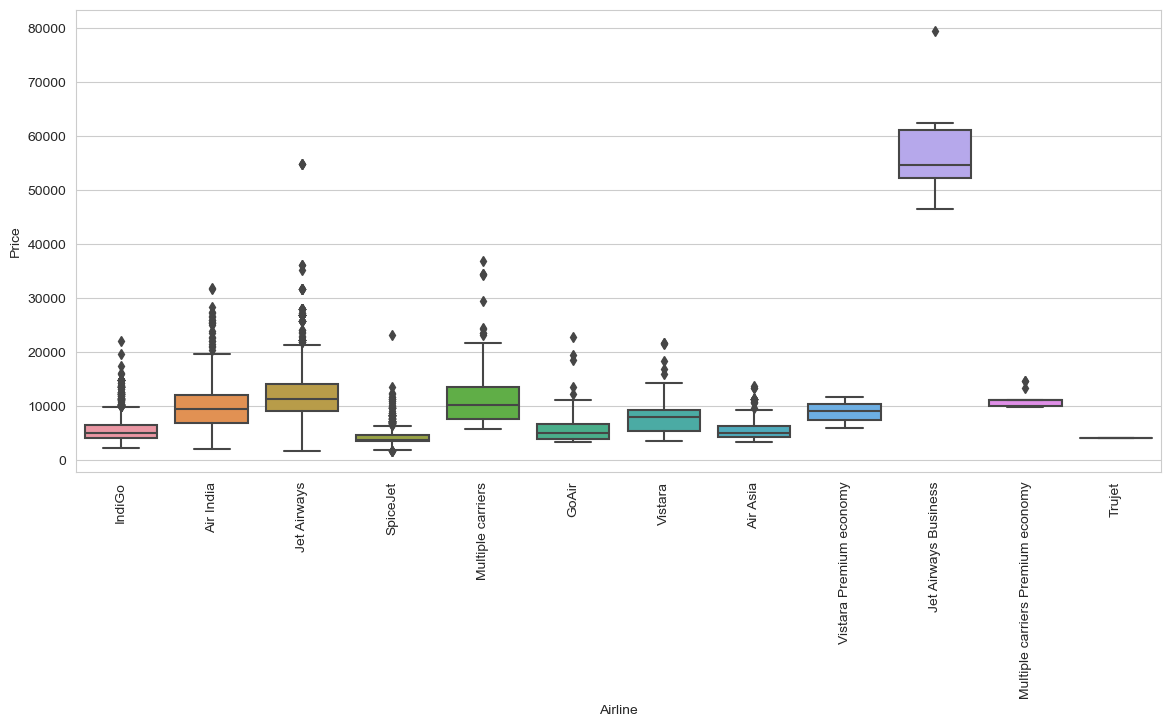

In [29]:
## checking for outliers
plt.subplots(figsize = (14,6))
sns.boxplot(x = train_data['Airline'] , y = train_data['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [30]:
## Five Point Summary
train_data.describe()

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Arrival_Min,Arrival_Hou,Dep_Min,Dep_Hou,Duration_Min,Duration_HOU
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.0,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824097,9086.292735,13.509081,4.708762,2019.0,13.348530,24.687793,12.490358,24.408819,28.329901,10.247051
std,0.675135,4610.885695,8.479363,1.164294,0.0,6.859398,16.504203,5.748819,18.767225,16.944689,8.495234
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,10.000000,8.000000,5.000000,15.000000,2.000000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,14.000000,25.000000,11.000000,25.000000,30.000000,8.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,19.000000,35.000000,18.000000,40.000000,45.000000,15.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,55.000000,47.000000


Total Number of outliers are 
 2636


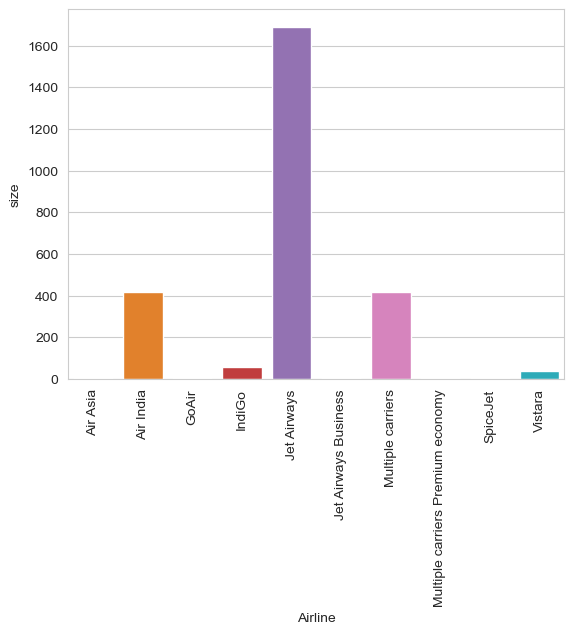

In [31]:
## how many observations are consedred outliers Regarding price 
print(f"Total Number of outliers are \n {np.sum(train_data.loc[train_data['Price']>train_data['Price'].quantile(0.75)].groupby('Airline').size())}")

#3 how many putliers in each airline
outlier_data = train_data.loc[train_data['Price']>train_data['Price'].quantile(0.75)].groupby('Airline' ,as_index = False).size().sort_values('Airline')
sns.barplot(x = outlier_data['Airline'] , y=outlier_data['size'])
plt.xticks(rotation = 'vertical')
plt.show()

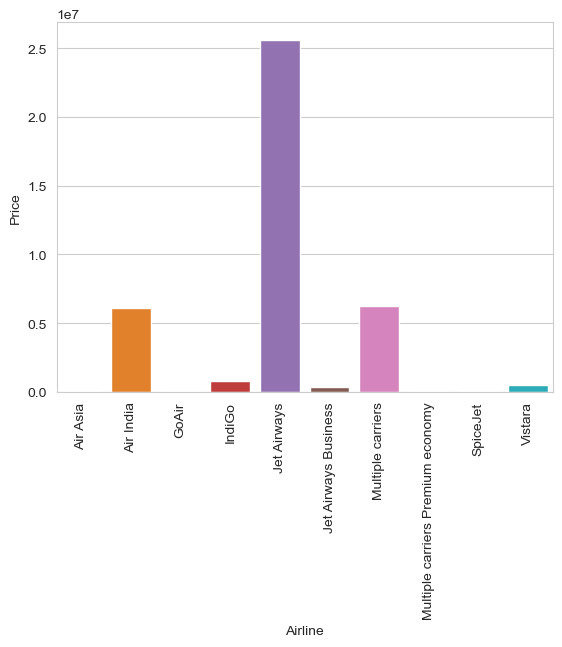

In [32]:
## the value of outliers regarding price
outlier_value = train_data.loc[train_data['Price']>train_data['Price'].quantile(0.75)].groupby('Airline' ,
                                                                            as_index = False)['Price'].sum().sort_values('Airline')
sns.barplot(x = outlier_value['Airline'] , y=outlier_value['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [33]:
## the value and numbers of outlier
pd.merge(outlier_data ,outlier_value, left_on='Airline' , right_on='Airline')

,Airline,size,Price
0,Air Asia,3,40718
1,Air India,419,6121736
2,GoAir,4,74510
3,IndiGo,57,833897
4,Jet Airways,1689,25604351
5,Jet Airways Business,6,350152
6,Multiple carriers,416,6251232
7,Multiple carriers Premium economy,3,42627
8,SpiceJet,3,49294
9,Vistara,36,495381


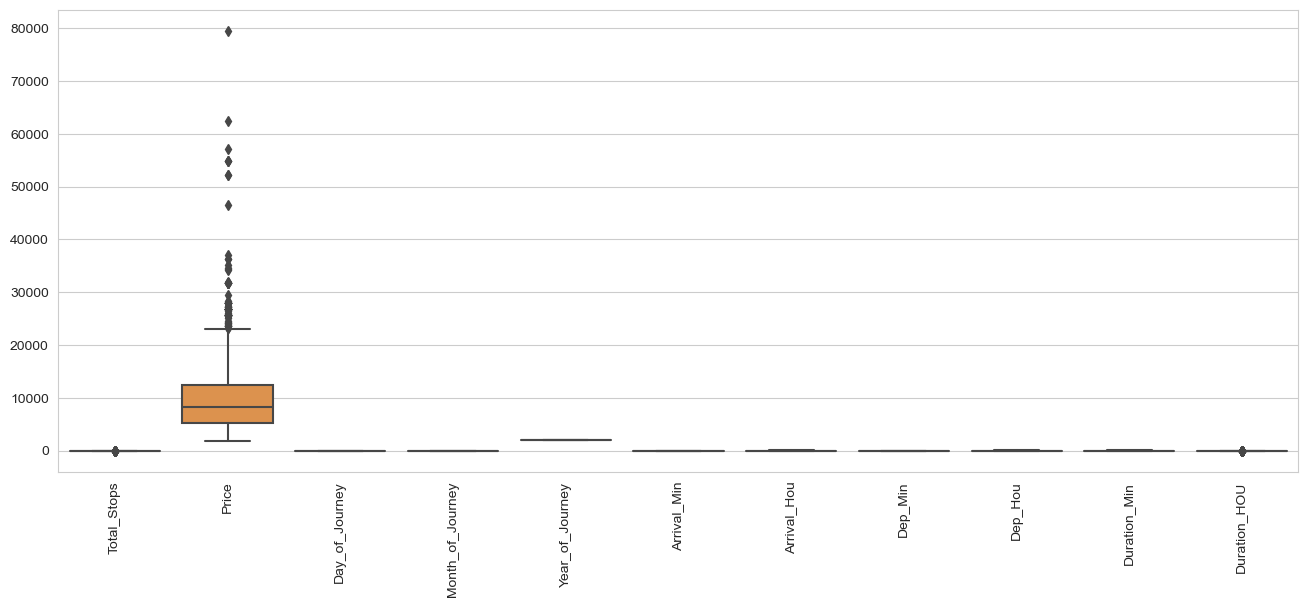

In [34]:
## removing the Outliers
## Ploting the outliers for all features 
plt.figure(figsize = (16,6))
sns.boxplot(train_data)
plt.xticks(rotation = 'vertical')
plt.show()

In [35]:
q1 = train_data['Price'].quantile(0.25)
q3 = train_data['Price'].quantile(0.75)
iqr = q3-q1
low_fence = q1 - 1.5*iqr
high_fence = q3 + 1.5*iqr
outliers = ((train_data['Price'] > high_fence)|(train_data['Price']<low_fence)).sum()
final_data = train_data[(train_data['Price']>=low_fence) & (train_data['Price']<=high_fence)]
print(f" Train_data is :-{train_data.shape} \n Number Of Outlier is:- {outliers} \n Data after removing outliers is {final_data.shape}")

 Train_data is :-(10682, 14) 
 Number Of Outlier is:- 94 
 Data after removing outliers is (10588, 14)


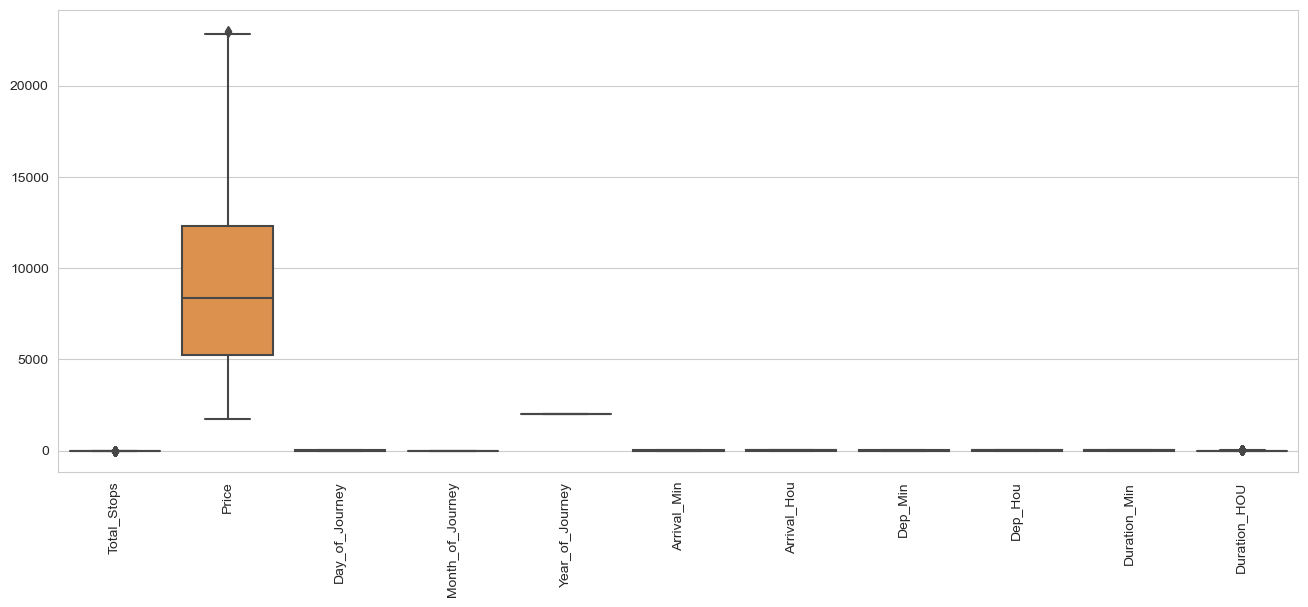

In [36]:
## ploting the price features after removing outliers
plt.figure(figsize = (16,6))
sns.boxplot(final_data)
plt.xticks(rotation = 'vertical')
plt.show()

In [37]:
## Five Point Summary after removing outliers
final_data.describe()['Price']

count    10588.000000
mean      8896.865603
std       4068.487666
min       1759.000000
25%       5228.000000
50%       8355.000000
75%      12312.000000
max      23001.000000
Name: Price, dtype: float64

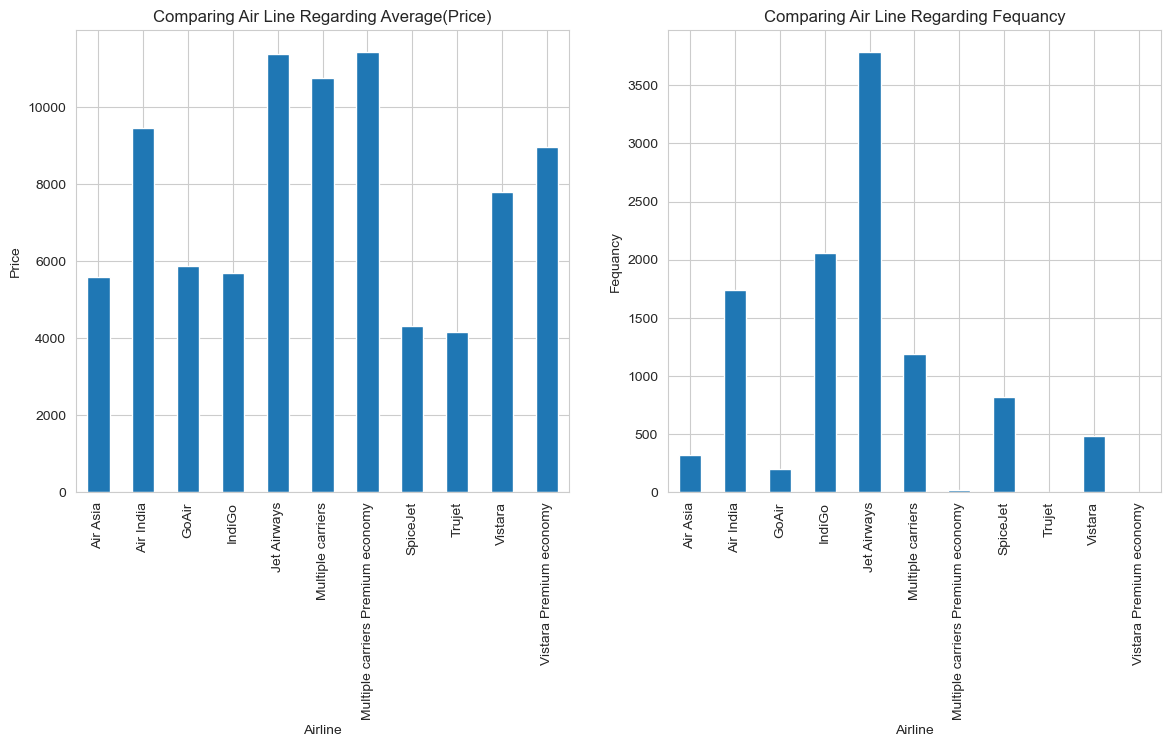

In [38]:
plt.subplots(figsize = (14,6))
plt.subplot(121)
final_data.groupby('Airline')['Price'].mean().plot(kind = 'bar')
plt.title('Comparing Air Line Regarding Average(Price)')
plt.ylabel('Price')
plt.subplot(122)
final_data.groupby('Airline')['Price'].count().plot(kind = 'bar')
plt.title('Comparing Air Line Regarding Fequancy')
plt.ylabel('Fequancy')
plt.show()

In [39]:
final_data.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Arrival_Min,Arrival_Hou,Dep_Min,Dep_Hou,Duration_Min,Duration_HOU
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,1,10,22,20,50,2
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,13,15,5,50,25,7
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,4,25,9,25,0,19
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,23,30,18,5,25,5
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,21,35,16,50,45,4


In [40]:
final_data.pivot_table(index='Airline' , columns='Total_Stops' , values = 'Price' ,aggfunc=['mean','count']).fillna(0)

mean                              \
Total_Stops                                  0             1             2   
Airline                                                                      
Air Asia                           4492.331492   7078.325581   6341.888889   
Air India                          5444.106280   8846.869159  11967.702270   
GoAir                              4726.173913   6884.676471      0.000000   
IndiGo                             4731.174053   7104.717528   7507.526316   
Jet Airways                        6175.078652  12119.322164  13325.898108   
Multiple carriers                     0.000000  10616.902546  13322.615385   
Multiple carriers Premium economy     0.000000  11418.846154      0.000000   
SpiceJet                           3805.423881   6638.204082      0.000000   
Trujet                                0.000000   4140.000000      0.000000   
Vistara                            6293.954545   9641.148837      0.000000   
Vistara Premium economy            8962.333333      0.000000      0.000000   

                                                           count          \
Total_Stops                                   3        4       0       1   
Airline                                                                    
Air Asia                               0.000000      0.0   181.0   129.0   
Air India                          12208.054054  17686.0   414.0   535.0   
GoAir                                  0.000000      0.0    92.0   102.0   
IndiGo                                 0.000000      0.0  1241.0   793.0   
Jet Airways                            0.000000      0.0   623.0  2477.0   
Multiple carriers                  17292.750000      0.0     0.0  1139.0   
Multiple carriers Premium economy      0.000000      0.0     0.0    13.0   
SpiceJet                               0.000000      0.0   670.0   147.0   
Trujet                                 0.000000      0.0     0.0     1.0   
Vistara                                0.000000      0.0   264.0   215.0   
Vistara Premium economy                0.000000      0.0     3.0     0.0   

                                                     
Total_Stops                            2     3    4  
Airline                                              
Air Asia                             9.0   0.0  0.0  
Air India                          749.0  37.0  1.0  
GoAir                                0.0   0.0  0.0  
IndiGo                              19.0   0.0  0.0  
Jet Airways                        687.0   0.0  0.0  
Multiple carriers                   39.0   8.0  0.0  
Multiple carriers Premium economy    0.0   0.0  0.0  
SpiceJet                             0.0   0.0  0.0  
Trujet                               0.0   0.0  0.0  
Vistara                              0.0   0.0  0.0  
Vistara Premium economy              0.0   0.0  0.0

## conclusion 
* 1_stop the most stop is taken generate Money

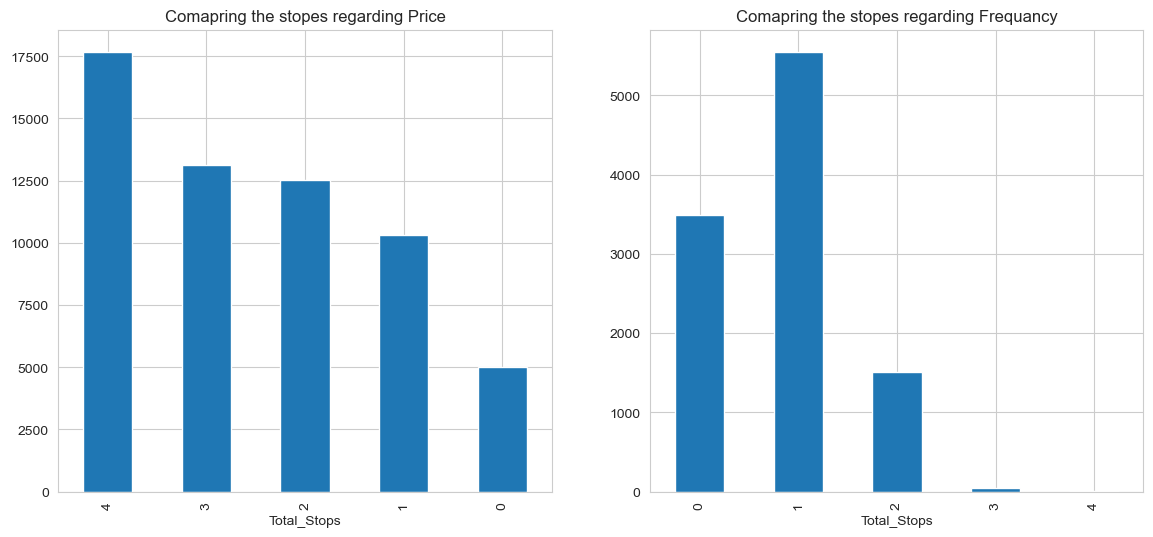

In [41]:
plt.subplots(figsize = (14,6))
plt.subplot(121)
final_data.groupby('Total_Stops')['Price'].mean().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Comapring the stopes regarding Price')
plt.subplot(122)
final_data.groupby('Total_Stops').size().plot(kind = 'bar')
plt.title('Comapring the stopes regarding Frequancy')
plt.show()

## Encoding

In [42]:
categorical_features = final_data.select_dtypes(include='O')
categorical_features.columns

Index(['Airline', 'Source', 'Destination'], dtype='object')

In [43]:
for i in categorical_features.columns :
    encoding = final_data[i].value_counts().to_dict()
    final_data[i] = final_data[i].map(encoding)

In [44]:
final_data

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Arrival_Min,Arrival_Hou,Dep_Min,Dep_Hou,Duration_Min,Duration_HOU
0,2053,2125,860,0,3897,24,3,2019,1,10,22,20,50,2
1,1736,2870,2870,2,7662,1,5,2019,13,15,5,50,25,7
2,3787,4521,4521,2,13882,9,6,2019,4,25,9,25,0,19
3,2053,2870,2870,1,6218,12,5,2019,23,30,18,5,25,5
4,2053,2125,860,1,13302,1,3,2019,21,35,16,50,45,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,319,2870,2870,0,4107,9,4,2019,22,25,19,55,30,2
10679,1736,2870,2870,0,4145,27,4,2019,23,20,20,45,35,2
10680,3787,2125,1265,0,7229,27,4,2019,11,20,8,20,0,3
10681,479,2125,860,0,12648,1,3,2019,14,10,11,30,40,2


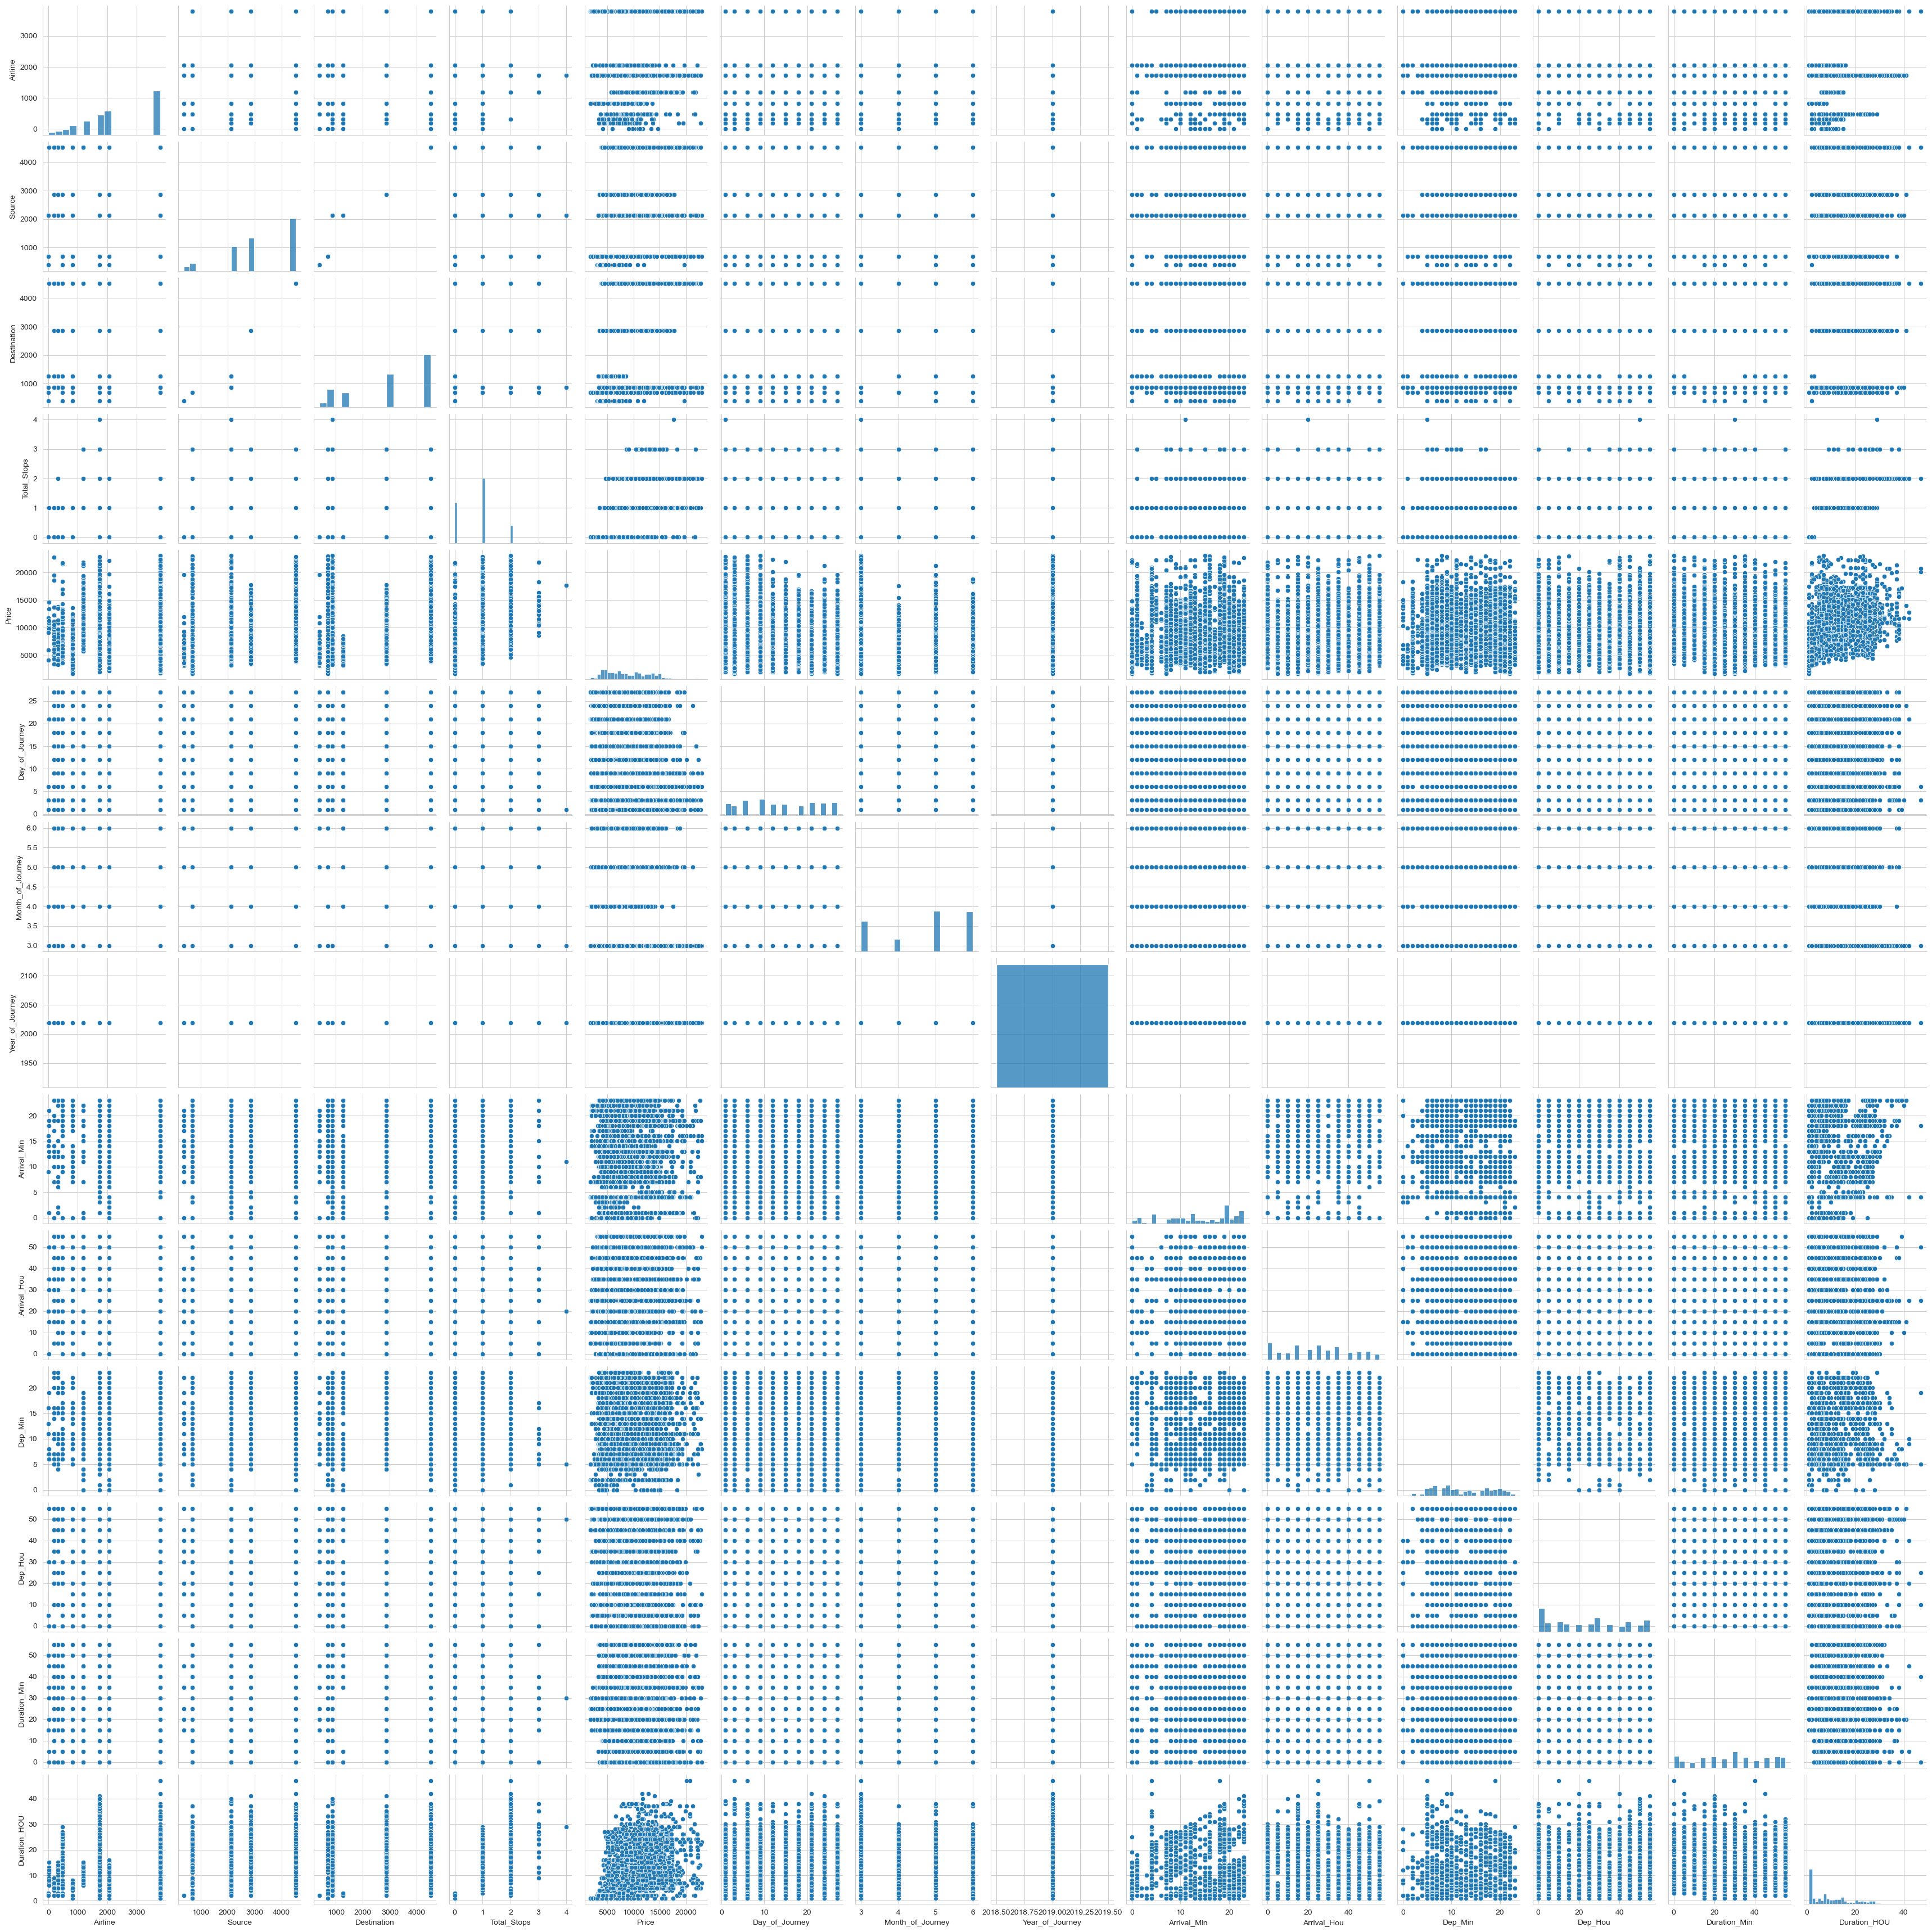

In [45]:
sns.pairplot(final_data)

In [46]:
## removing the year columns we only have 1 year is 2019
del(final_data['Year_of_Journey'])

<Axes: >

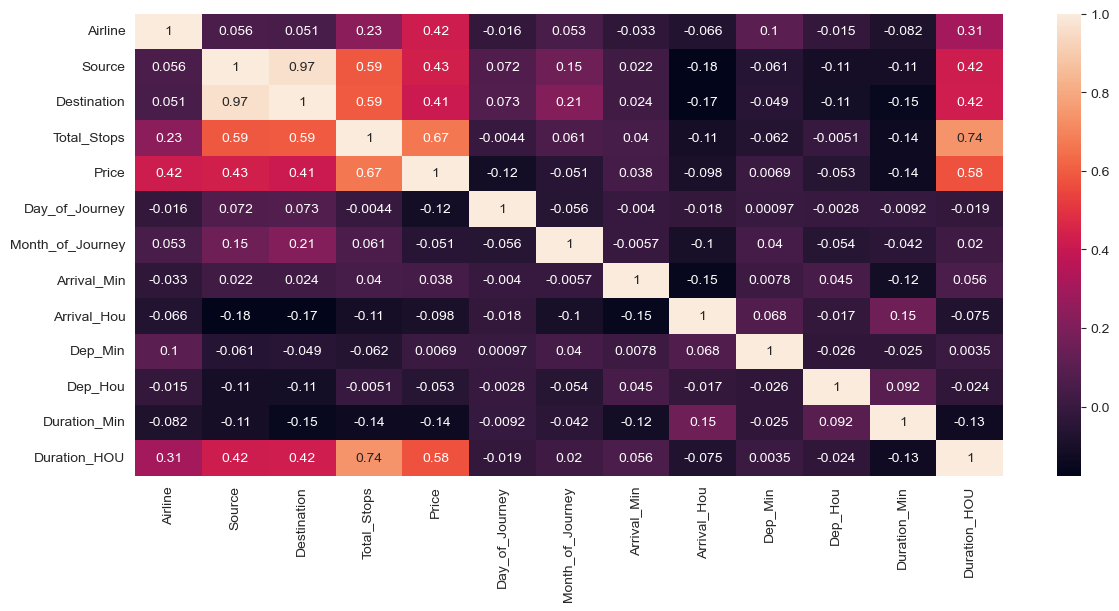

In [47]:
## showing the correlation between features and target
correlation = final_data.corr()
plt.figure(figsize = (14,6))
sns.heatmap(correlation , annot=True , cbar=True)

## most features impact the target 
1. total stops
2. duration hour
3. destination and source
4. airline

## Spliting The Data into Features And Target Data 

In [48]:
X = final_data.drop(columns = ['Price'])
y = final_data['Price'].values

## Spliting The Data Into Training And Testing Data

In [49]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test  = train_test_split(X , y  , test_size=0.2 , random_state=2 , shuffle=True)

## Features Selection 

In [50]:
## using gain_information
from sklearn.feature_selection import mutual_info_regression
selctor = mutual_info_regression(X_train , y_train , random_state=2)

In [51]:
pd.DataFrame(list(zip(selctor , X_train.columns)) , columns = ['Score' , 'Features']).sort_values('Score'  ,ascending = False)

,Score,Features
0,1.279446,Airline
2,1.152069,Destination
6,1.104469,Arrival_Min
11,1.077483,Duration_HOU
1,1.040300,Source
7,0.878584,Arrival_Hou
8,0.875664,Dep_Min
3,0.777652,Total_Stops
9,0.723017,Dep_Hou
10,0.664160,Duration_Min


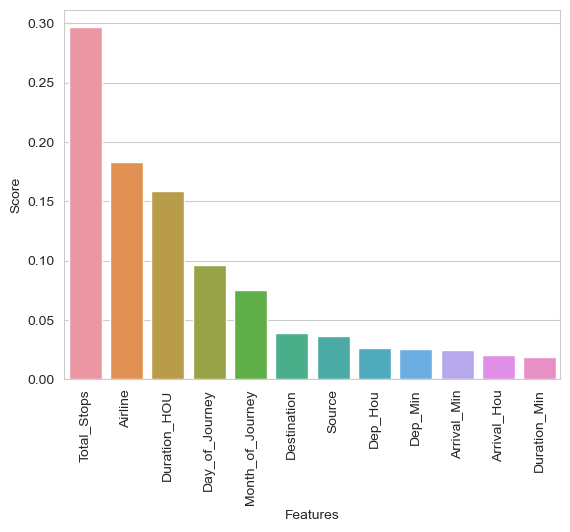

In [52]:
## features selection by using tress method
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train ,y_train )
sel_feat = pd.DataFrame(list(zip(model.feature_importances_ , X_train.columns)) , columns = ['Score' , 'Features']).sort_values('Score'  ,ascending = False)
sns.barplot(x = sel_feat['Features'] , y = sel_feat['Score'])
plt.xticks(rotation = 'vertical')
plt.show()

In [53]:
## SequentialFeatureSelector teniquehi
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200 , max_depth=5)
sfs_selector = SFS(model ,forward=True , floating=False , scoring='r2'  , cv=5 ,k_features = 6 )
sfs_selector.fit(X_train , y_train)


SequentialFeatureSelector(estimator=RandomForestRegressor(max_depth=5,
                                                          n_estimators=200),
                          k_features=(6, 6), scoring='r2')

In [54]:
pd.DataFrame(sfs_selector.get_metric_dict()).T[-1:]

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
6,"(0, 3, 4, 5, 6, 11)","[0.7328492501950863, 0.7252140947992445, 0.703...",0.722379,"(Airline, Total_Stops, Day_of_Journey, Month_o...",0.012713,0.009891,0.004946


In [55]:
sfs_selector.feature_names_to_idx_mapper

{'Airline': 0,
 'Source': 1,
 'Destination': 2,
 'Total_Stops': 3,
 'Day_of_Journey': 4,
 'Month_of_Journey': 5,
 'Arrival_Min': 6,
 'Arrival_Hou': 7,
 'Dep_Min': 8,
 'Dep_Hou': 9,
 'Duration_Min': 10,
 'Duration_HOU': 11}

In [56]:
## selecting more importance features
X_train = X_train.drop(columns = ['Source','Duration_Min','Dep_Hou','Dep_Min','Arrival_Hou']).values

In [57]:
X_test = X_test.drop(columns = ['Source','Duration_Min','Dep_Hou','Dep_Min','Arrival_Hou']).values

## based on those metrics we can say most 3 features impact the price are :-
1. Total_Stops
2. Airline
3. Duration_HOU

## Hyper-parameters Optimiziation Step

In [58]:
import sklearn

In [59]:
## using optuna technique 
import optuna
def objective(trial):
    n_estimators =trial.suggest_int('n_estimators' , 200,1500,20)  # more trees to capture more inforamtion
    
    max_depth = int(trial.suggest_float('max_depth' , 10,40,log = True)) #to capture more inforamtion
    
    min_samples_split = int(trial.suggest_int('min_samples_split' , 3,15,2)) ## to prevent overfitting
    
    min_samples_leaf = int(trial.suggest_int('min_samples_leaf' ,3,15,2)) #to prevent overfitting
    
    max_features = trial.suggest_float('max_features' ,0.75,0.95) ## for more information
    
    ## To evaluate the spliting 
    criterion = trial.suggest_categorical( 'criterion' , ["squared_error", "absolute_error", "friedman_mse", "poisson"]) 
    
    reg = sklearn.ensemble.RandomForestRegressor(n_estimators = n_estimators ,max_depth = max_depth , 
                  min_samples_split = min_samples_split , max_features = max_features , min_samples_leaf=min_samples_leaf  , 
                                                 criterion =criterion)
    
    return  sklearn.model_selection.cross_val_score(reg , X_train , y_train , cv = 5 , n_jobs=-1).mean()

In [60]:
study = optuna.create_study(direction= 'maximize')
study.optimize(objective ,n_trials=100)

[I 2024-04-30 17:44:38,218] A new study created in memory with name: no-name-fb7c8918-3b3f-4838-a46a-eae189a26217
[I 2024-04-30 17:44:44,949] Trial 0 finished with value: 0.7975033934906108 and parameters: {'n_estimators': 640, 'max_depth': 19.060014555341937, 'min_samples_split': 11, 'min_samples_leaf': 9, 'max_features': 0.7879810183891666, 'criterion': 'friedman_mse'}. Best is trial 0 with value: 0.7975033934906108.
[I 2024-04-30 17:44:58,080] Trial 1 finished with value: 0.8084547122289791 and parameters: {'n_estimators': 1220, 'max_depth': 27.020051075241575, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 0.8246448463811833, 'criterion': 'friedman_mse'}. Best is trial 1 with value: 0.8084547122289791.
[I 2024-04-30 17:45:11,385] Trial 2 finished with value: 0.7848314100853291 and parameters: {'n_estimators': 1480, 'max_depth': 29.193342763053916, 'min_samples_split': 15, 'min_samples_leaf': 15, 'max_features': 0.8795594829371728, 'criterion': 'squared_error'}. Best

[I 2024-04-30 18:09:37,519] Trial 27 finished with value: 0.7886118234887984 and parameters: {'n_estimators': 560, 'max_depth': 22.426144517285607, 'min_samples_split': 7, 'min_samples_leaf': 13, 'max_features': 0.8928534605353691, 'criterion': 'poisson'}. Best is trial 22 with value: 0.8145389622440989.
[I 2024-04-30 18:09:50,151] Trial 28 finished with value: 0.808578142480276 and parameters: {'n_estimators': 720, 'max_depth': 18.229526822935604, 'min_samples_split': 13, 'min_samples_leaf': 5, 'max_features': 0.9256624320355767, 'criterion': 'poisson'}. Best is trial 22 with value: 0.8145389622440989.
[I 2024-04-30 18:10:02,250] Trial 29 finished with value: 0.803098813918848 and parameters: {'n_estimators': 880, 'max_depth': 19.70312488991818, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': 0.8399241690282861, 'criterion': 'poisson'}. Best is trial 22 with value: 0.8145389622440989.
[I 2024-04-30 18:10:09,918] Trial 30 finished with value: 0.7918316209645491 and param

[I 2024-04-30 18:26:11,165] Trial 54 finished with value: 0.814367095783369 and parameters: {'n_estimators': 680, 'max_depth': 13.2608652662788, 'min_samples_split': 11, 'min_samples_leaf': 3, 'max_features': 0.819569594795381, 'criterion': 'poisson'}. Best is trial 22 with value: 0.8145389622440989.
[I 2024-04-30 18:26:16,593] Trial 55 finished with value: 0.8090121135092811 and parameters: {'n_estimators': 500, 'max_depth': 13.462389271073205, 'min_samples_split': 11, 'min_samples_leaf': 5, 'max_features': 0.8071963186629246, 'criterion': 'poisson'}. Best is trial 22 with value: 0.8145389622440989.
[I 2024-04-30 18:26:23,240] Trial 56 finished with value: 0.8136334116258575 and parameters: {'n_estimators': 680, 'max_depth': 12.23897945486165, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 0.8187377696305805, 'criterion': 'friedman_mse'}. Best is trial 22 with value: 0.8145389622440989.
[I 2024-04-30 18:26:31,361] Trial 57 finished with value: 0.8126256871311396 and p

[I 2024-04-30 18:31:36,767] Trial 81 finished with value: 0.8145927395980911 and parameters: {'n_estimators': 1240, 'max_depth': 12.933487162610371, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 0.7781590759756001, 'criterion': 'squared_error'}. Best is trial 71 with value: 0.8149755251594204.
[I 2024-04-30 18:31:50,076] Trial 82 finished with value: 0.8146125938441638 and parameters: {'n_estimators': 1300, 'max_depth': 12.215134132310911, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 0.7950888946551558, 'criterion': 'squared_error'}. Best is trial 71 with value: 0.8149755251594204.
[I 2024-04-30 18:32:03,463] Trial 83 finished with value: 0.814844203995316 and parameters: {'n_estimators': 1340, 'max_depth': 12.43941796876613, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 0.7902133982954634, 'criterion': 'squared_error'}. Best is trial 71 with value: 0.8149755251594204.
[I 2024-04-30 18:32:14,952] Trial 84 finished with value: 0.814596

In [61]:
trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.8150059809586618
Best hyperparameters: {'n_estimators': 1060, 'max_depth': 13.029544562971296, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 0.823844628919128, 'criterion': 'squared_error'}


In [63]:
model_rand = RandomForestRegressor(n_estimators=1060 , max_depth=13 , min_samples_split=9 ,
                                   max_features=0.82,min_samples_leaf=3 , ccp_alpha=0.1 ,criterion='squared_error' )
model_rand.fit(X_train , y_train)

RandomForestRegressor(ccp_alpha=0.1, max_depth=13, max_features=0.82,
                      min_samples_leaf=3, min_samples_split=9,
                      n_estimators=1060)

In [64]:
print(f"Traing Data score is :  {model_rand.score(X_train , y_train)}")
print(f"Testing Data score is :  {model_rand.score(X_test , y_test)}")


Traing Data score is :  0.873214383121178
Testing Data score is :  0.8224359520876237


In [65]:
pred = model_rand.predict(X_test)

<Axes: >

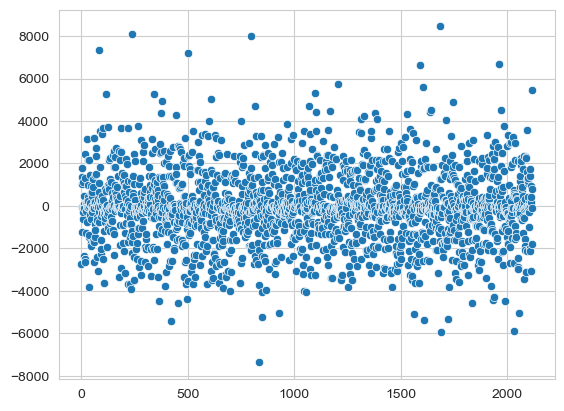

In [66]:
resdual= y_test - pred
sns.scatterplot(resdual)


## The resdaul does not follow any pattern

In [67]:
from sklearn.metrics import mean_absolute_error
mean_sq = mean_absolute_error(y_test , pred)
mean_sq

1176.2127157778407

<Axes: >

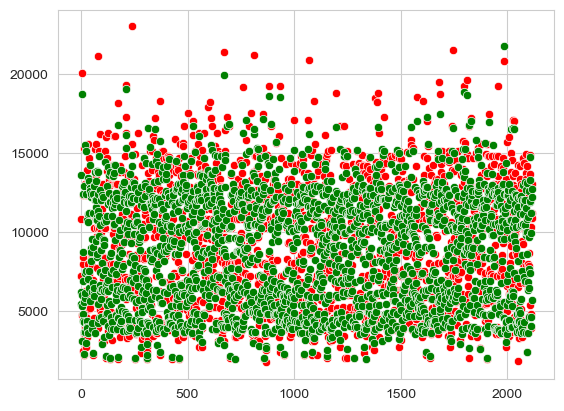

In [76]:
sns.scatterplot(y_test ,color = 'red')
sns.scatterplot(pred, color = "green")

In [69]:
## saving the model 
import pickle
airline_pred = 'airline_prediction.sav'
pickle.dump(model_rand , open(airline_pred , 'wb'))